# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [7]:
# Q1 (code)
# Install Package little_mallet_wrapper
!pip install little_mallet_wrapper

In [8]:
# Install Package tomotopy
!pip install tomotopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 32.8 MB/s eta 0:00:00


In [9]:
# Import Packages We Need
import pandas as pd
import tomotopy as tp
import little_mallet_wrapper

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [4]:
# Access Files in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Q2 (code)
# Import Two Datasets in Google Drive
# Remember to adjust the file paths in the code according to the location of your datasets
df_Sanders = pd.read_csv("/content/drive/My Drive/Assignment3-AD/sanders_tweets.csv")
df_Trump = pd.read_csv("/content/drive/My Drive/Assignment3-AD/trump_tweets.csv")

In [11]:
# Overview of Two Datasets
df_Sanders.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


In [12]:
df_Trump.head()

,Username,TweetId,Title,Content
0,@realDonaldTrump,822421390125043713,@realDonaldTrump_822421390125043713,It all begins today! I will see you at 11:00 ...
1,@realDonaldTrump,822501803615014918,@realDonaldTrump_822501803615014918,Today we are not merely transferring power fr...
2,@realDonaldTrump,822501939267141634,@realDonaldTrump_822501939267141634,"power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,822502135233384448,@realDonaldTrump_822502135233384448,What truly matters is not which party control...
4,@realDonaldTrump,822502270503972872,@realDonaldTrump_822502270503972872,"January 20th 2017, will be remembered as the ..."


In [13]:
# Concatenate Two Datasets
df = pd.concat([df_Sanders, df_Trump])

In [14]:
# Overview of the Dataframe Now
display(df)

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...
...,...,...,...,...
23070,@realDonaldTrump,1346912780700577792,@realDonaldTrump_1346912780700577792,I am asking for everyone at the U.S. Capitol ...
23071,@realDonaldTrump,1346928882595885058,@realDonaldTrump_1346928882595885058,https://t.co/Pm2PKV0Fp3
23072,@realDonaldTrump,1347334804052844550,@realDonaldTrump_1347334804052844550,https://t.co/csX07ZVWGe
23073,@realDonaldTrump,1347555316863553542,@realDonaldTrump_1347555316863553542,"The 75,000,000 great American Patriots who vo..."


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [18]:
# Q3 (code)
# Import a Package We Need for Working with Regular Expressions
import re
# Create Lists We Will Use
training_data = []
original_texts = []
titles = []

# Remove Stopwords, Punctions, Numbers and etc.
for index, row in df.iterrows():
    processed_text = little_mallet_wrapper.process_string(row['Content'], numbers='remove')
    # Remove URLs and User Mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    training_data.append(processed_text)
    original_texts.append(row['Content'])
    titles.append(row["Title"])

In [22]:
# Let's display some examples in these lists
training_data[:5]

['wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase minimum wage must tax rich raise minimum wage least',
 'amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act',
 'resources skills techniques get rid poverty question whether nation martin luther king   x vksfnvx',
 'surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world',
 'president elect biden covid rescue plan begin provide people much needed support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families   i']

In [23]:
original_texts[:5]

['Wealth increase in past 10 months:\n⬆️$173 billion: Elon Musk\n⬆️$77 billion: Jeff Bezos\n⬆️$60 billion: Walton family\n⬆️$43 billion: Bill Gates\n⬆️$39 billion: Mark Zuckerberg\n\n12-year increase in U.S. minimum wage: $0\n\nWe must tax the rich &amp; raise the minimum wage to at least $15.',
 'Amidst massive income and wealth inequality tens of millions of Americans are working for starvation wages. We need to raise the minimum wage to a living wage, at least $15 an hour. No more excuses. We need to act NOW.',
 '“We now have the resources, we now have the skills, we now have the techniques to get rid of poverty. And the question is whether our nation has the will.” — Dr. Martin Luther King, Jr. https://t.co/X03VKsfNVX',
 'After surviving an attempt on his life, Russian activist Alexei Navalny has been detained after bravely returning to Russia today. I call for his release.\n\nThe United States must stand with those fighting corruption and working for democracy around the world.',


In [24]:
titles[:5]

['SenSanders_1351670845639421952',
 'SenSanders_1351259762722279424',
 'SenSanders_1351242822293319680',
 'SenSanders_1350885541911400448',
 'SenSanders_1349880150041780224']

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [89]:
# Q4 (code)
# Number of topics to return
# The number of topics is updated to a more proper one after several tests
num_topics = 18
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.783725530166834
Iteration: 10	Log-likelihood: -9.354942716790044
Iteration: 20	Log-likelihood: -9.177801294104146
Iteration: 30	Log-likelihood: -9.080307784367358
Iteration: 40	Log-likelihood: -9.018243659259035
Iteration: 50	Log-likelihood: -8.975824098121445
Iteration: 60	Log-likelihood: -8.941607907988374
Iteration: 70	Log-likelihood: -8.914932631867165
Iteration: 80	Log-likelihood: -8.896430673852791
Iteration: 90	Log-likelihood: -8.877939462749536


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [90]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"Topic {topic_number+1}\n\n{topic_words}\n")


Topic Model Results:


Topic 1

health care people right country every americans must need million

Topic 2

new president york korea good north covid great meeting coronavirus

Topic 3

great military endorsement total strong complete amendment vets thank second

Topic 4

news fake media never witch hunt even cnn story people

Topic 5

change climate energy must jobs fossil american people planet trump

Topic 6

democrats want left people never nothing democrat radical joe get

Topic 7

thank great president today whitehouse god puerto first happy rico

Topic 8

china trade many back would states united great much years

Topic 9

president whitehouse today law states united american national federal america

Topic 10

people must trump war congress country end american senate stand

Topic 11

trump fbi election obama campaign hillary clinton collusion russia mueller

Topic 12

president trump court biden supreme years joe justice americans unemployment

Topic 13

president trump impe

In [ ]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

**Answer:**  
Based on the top words of each topic, we can descirbe what each topic is about in general.
1. Healthcare and Rights: This topic seems to be focused on healthcare, rights, and the needs of Americans, with mentions of health care, people's rights, and the country's needs.
2. Current Events and Leadership: It discusses current events and leadership, including mentions of the president, New York, North Korea, COVID-19, and meetings.
3. Military and Endorsements: This topic revolves around the military, endorsements, and support, with mentions of the military, endorsements, and appreciation for support.
4. Media and Criticism: It focuses on criticism of the media, particularly fake news and witch hunts, with mentions of fake news, media, witch hunts, and CNN.
5. Climate Change and Energy: This topic addresses climate change, energy, and jobs, with mentions of climate change, energy, jobs, fossil fuels, and the environment.
6. Political Opposition: It discusses opposition to Democrats and their policies, with mentions of Democrats, opposition, and radicalism.
7. Thankfulness and Events: This topic expresses gratitude and acknowledges events, with mentions of gratitude, events, and the White House.
8. Trade and Economy: It addresses trade, the economy, and the United States' relationship with China, with mentions of China, trade, the United States, and economic matters.
9. Government and Legislation: This topic discusses the government, legislation, and national matters, with mentions of the president, the White House, and federal laws.
10. Conflict and Leadership: It discusses conflicts and leadership, with mentions of war, Congress, the president, and standing up for America.
11. Political Controversy: This topic addresses political controversies surrounding elections and investigations, with mentions of the FBI, election, collusion, and Russia.
12. Legal Matters and Leadership: It discusses legal matters and leadership, with mentions of the president, the Supreme Court, and justice.
13. Impeachment Proceedings: This topic focuses on impeachment proceedings and the involvement of Democrats, with mentions of impeachment, Democrats, and the House.
14. Taxation and Workers' Rights: It addresses taxation, workers' rights, and social security, with mentions of taxes, wages, social security, and cuts.
15. Economic Conditions: This topic discusses economic conditions, including wealth, jobs, and drug prices, with mentions of the economy, wealth, jobs, and drug prices.
16. Media Engagement: It discusses engagement with the media, particularly Fox News and Twitter, with mentions of Fox News, Twitter, and press conferences.
17. Gratitude and Patriotism: This topic expresses gratitude and patriotism, with mentions of gratitude, voting, America, and making America great again (MAGA).
18. Border Security and Policy: It addresses border security and policy, particularly regarding Mexico, with mentions of the border, Mexico, and security.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [91]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5891914256848395 
Per Topic: [0.6454111099243164, 0.5541603356599808, 0.7731705367565155, 0.6684315653517843, 0.5767422512173652, 0.5685464225709438, 0.5501237899065018, 0.5359752327203751, 0.4928275108337402, 0.5080487728118896, 0.7571592658758164, 0.5142643421888351, 0.6395917654037475, 0.6215026073157788, 0.5619897395372391, 0.5869289323687553, 0.5384527906775475, 0.5121186912059784]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [ ]:
# Q6 (words)

**Answer:**  
I used 15 as the initial number of topics, and here are the results I got:  

"==== Coherence : c_v ====  
Average: 0.5799576835831007   
Per Topic: [0.7202098160982132, 0.5326632514595986, 0.530032554268837, 0.4873562455177307, 0.5668193981051445, 0.7475377947092057, 0.5884722843766212, 0.6747554272413254, 0.60403413772583, 0.6812003448605537, 0.5421845614910126, 0.5166721254587173, 0.5430989012122154, 0.5136850029230118, 0.4506434082984924]"  

While this result is not unfavorable, as the coherence score ranges between 0 and 1, and the obtained score is relatively moderate, it's always worthwhile to explore further to seek potential improvements.

Subsequently, I experimented with different numbers of topics to train the model again, as executed in the subsequent code snippet (X1). Both excessively high and low numbers of topics can be improper, so I tested within the range of 5 to 20 topics.

A line chart visually depicts the fluctuation of coherence scores, revealing that the coherence score peaks at 18 topics. Consequently, I employed 18 topics to retrain the model, yielding an enhanced score, which is:

"==== Coherence : c_v ====
Average: 0.5891914256848395
Per Topic: [0.6454111099243164, 0.5541603356599808, 0.7731705367565155, 0.6684315653517843, 0.5767422512173652, 0.5685464225709438, 0.5501237899065018, 0.5359752327203751, 0.4928275108337402, 0.5080487728118896, 0.7571592658758164, 0.5142643421888351, 0.6395917654037475, 0.6215026073157788, 0.5619897395372391, 0.5869289323687553, 0.5384527906775475, 0.5121186912059784]"

The obtained result shows some improvement, which is encouraging. While it may not be perfect, it does represent progress.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

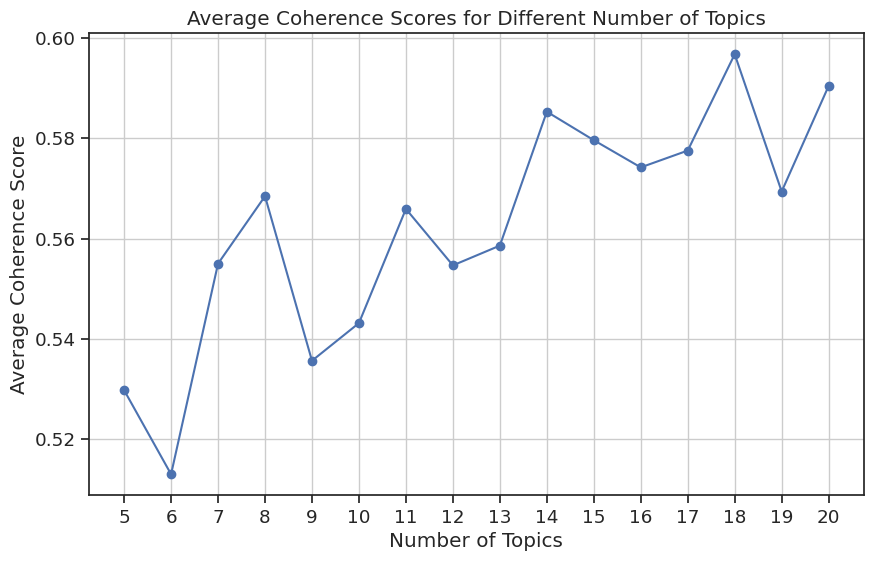

In [88]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
# Import a Package We Need for Plotting
import matplotlib.pyplot as plt

# Define a Function for Obtaining Results Using Different Numbers in a Range
def plot_coherence_scores(training_data, num_topics_range, num_topic_words=10):
    avg_coherences = []

    for num_topics in num_topics_range:
        # Initialize the LDA model
        model = tp.LDAModel(k=num_topics)

        # Add each document to the model, after splitting it up into words
        for text in training_data:
            model.add_doc(text.strip().split())

        # Iterate over the data 10 times
        iterations = 10
        for i in range(0, 100, iterations):
            model.train(iterations)

        # Calculate coherence score
        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        avg_coherences.append(average_coherence)


    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_range, avg_coherences, marker='o', linestyle='-')
    plt.title('Average Coherence Scores for Different Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence Score')
    plt.xticks(num_topics_range)
    plt.grid(True)
    plt.show()

# Example：
num_topics_range = range(5,21)
plot_coherence_scores(training_data, num_topics_range)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [92]:
# Q7a (code)
# Calculate the topic distributions for all tweets
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [93]:
# Example
topic_distributions[12]

[0.44909024,
 0.0038399184,
 0.0027417354,
 0.005167089,
 0.0027760556,
 0.005470455,
 0.003291719,
 0.0042073806,
 0.0038198507,
 0.005330798,
 0.003564826,
 0.0034289705,
 0.0036994552,
 0.48639366,
 0.0039536655,
 0.0027533807,
 0.004994326,
 0.0054765223]

In [76]:
# Import a Function for Displaying Markdown-formatted text
from IPython.display import Markdown, display

# Function to display Markdown-formatted text
def make_md(string):
    display(Markdown(str(string)))

# Function to Get the Top Documents for Topics
def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)
    # Extract topic words for display
    topic_words = topics[topic_index]
    # Display the topic and its top words
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        # Display document and its probability for the topic
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [95]:
# Display 6 documents for topic 2, 8, 14
get_top_docs(titles, topic_distributions, topic_index=2, n=6)

### ✨Topic 2✨

great military endorsement total strong complete amendment vets thank second



---


✨  
**Topic Probability**: 0.9349005818367004  
**Document**: @realDonaldTrump_1234455653529325568



✨  
**Topic Probability**: 0.9349005818367004  
**Document**: @realDonaldTrump_1219304652438675456



✨  
**Topic Probability**: 0.9300710558891296  
**Document**: @realDonaldTrump_1314673151406682117



✨  
**Topic Probability**: 0.9300710558891296  
**Document**: @realDonaldTrump_1289633894237474816



✨  
**Topic Probability**: 0.9300710558891296  
**Document**: @realDonaldTrump_1289353615224668160



✨  
**Topic Probability**: 0.9300710558891296  
**Document**: @realDonaldTrump_1234650923210878976



In [96]:
get_top_docs(titles, topic_distributions, topic_index=8, n=6)

### ✨Topic 8✨

president whitehouse today law states united american national federal america



---


✨  
**Topic Probability**: 0.8966454267501831  
**Document**: @realDonaldTrump_825017279209410561



✨  
**Topic Probability**: 0.8836929798126221  
**Document**: @realDonaldTrump_1199091814340472832



✨  
**Topic Probability**: 0.8567682504653931  
**Document**: @realDonaldTrump_896431205549318144



✨  
**Topic Probability**: 0.8567682504653931  
**Document**: @realDonaldTrump_839268048313929729



✨  
**Topic Probability**: 0.8431429266929626  
**Document**: @realDonaldTrump_950507353094356993



✨  
**Topic Probability**: 0.8306290507316589  
**Document**: @realDonaldTrump_953273134655987716



In [97]:
get_top_docs(titles, topic_distributions, topic_index=14, n=6)

### ✨Topic 14✨

people economy street year wall time wealth drug americans prices



---


✨  
**Topic Probability**: 0.9360288381576538  
**Document**: SenSanders_1237385973429764096



✨  
**Topic Probability**: 0.9286358952522278  
**Document**: SenSanders_1127618567099310080



✨  
**Topic Probability**: 0.9257766604423523  
**Document**: SenSanders_1202287585684529152



✨  
**Topic Probability**: 0.919310986995697  
**Document**: SenSanders_1204824151351017472



✨  
**Topic Probability**: 0.9047852754592896  
**Document**: SenSanders_1221233701297754112



✨  
**Topic Probability**: 0.896846354007721  
**Document**: SenSanders_1078354416787513344



In [ ]:
print(topic_distributions[32],topic_distributions[32], topic_distributions[32])

Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [ ]:
# Q7b (words)

**Answer**:

These three topics are all by one politician.

Topic 2, which encompasses current events and leadership, seems to frequently addressed by President Trump, including mentions of New York, North Korea, COVID-19, and meetings. On the other hand, Topic 8 delves into trade, the economy, and the U.S.-China relationship, which are often associated with Trump's policies and priorities.

Meanwhile, Topic 14, focusing on taxation, workers' rights, and social security, appears to resonate with Senator Sanders' words, as it touches on issues such as taxes, wages, social security, and cuts.

Politicians often adhere to consistent messaging and communication strategies tailored to their political ideologies and target audience. Therefore, topics that resonate with a politician's core message and platform are more likely to be emphasized in their communication channels, including social media.


Politicians may prioritize topics that align with their policy positions and legislative agenda. For example, if a politician has introduced bills or advocated for specific policies related to healthcare or trade, they are likely to address these topics more frequently in their tweets.

Politicians may tailor their communication to address the concerns and interests of their constituents. Therefore, topics that are relevant to the needs and preferences of their constituents are more likely to be highlighted in their tweets.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [98]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [99]:
# Q8 (code)
# Create a heatmap using the random sample
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

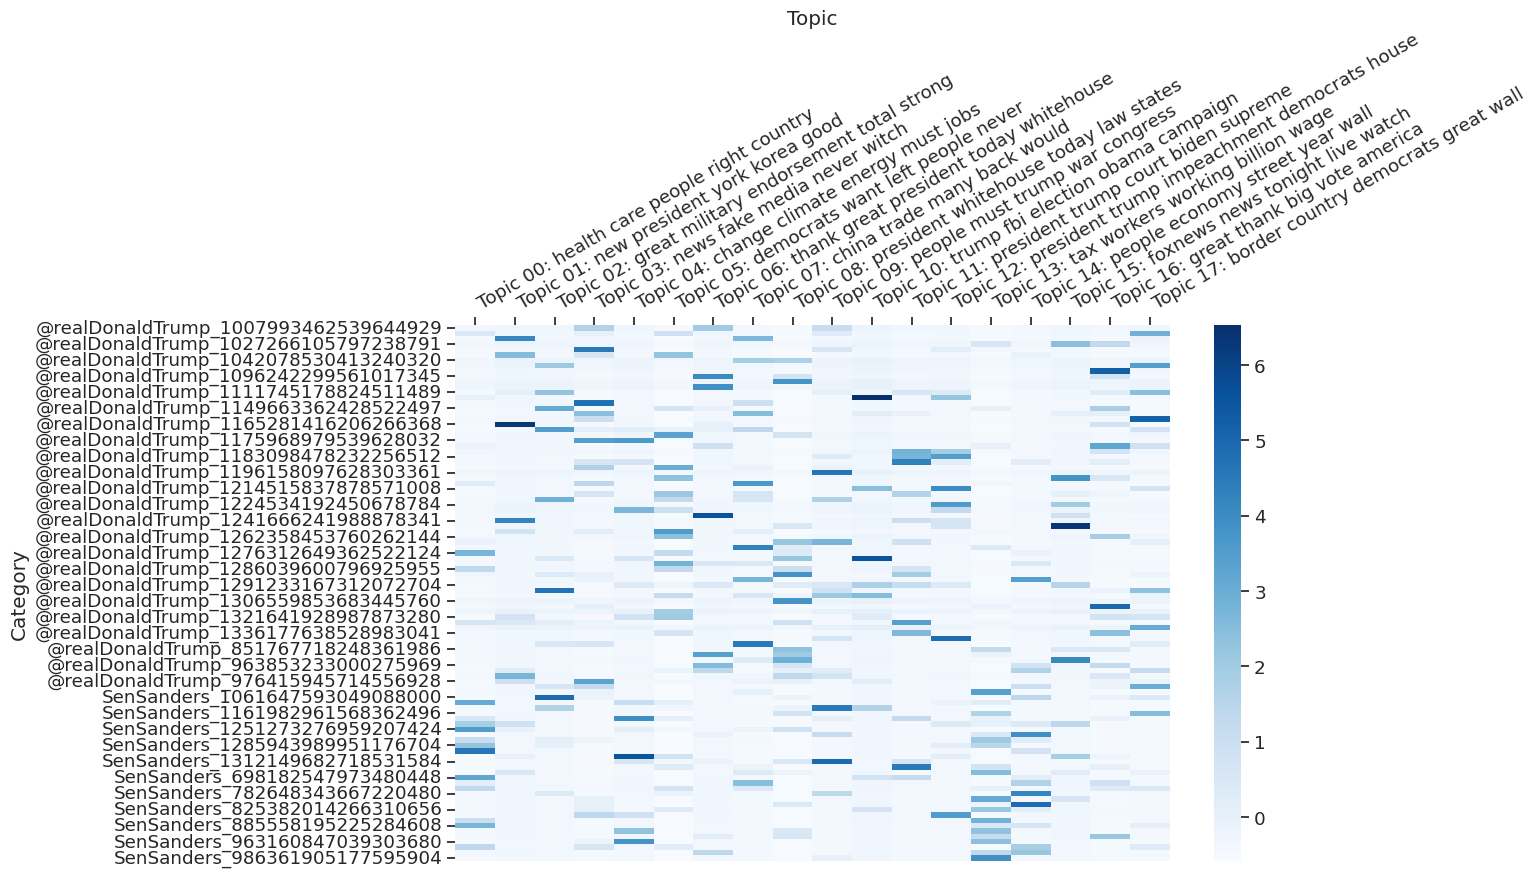

In [103]:
# Apply the Function to the Data
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(15,9))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [ ]:
# Q9 (words)

**Answer:**

Yes, there are noticeable patterns in the probability distributions of topics for each politician, indicating topics that are more likely to be associated with one politician than the other.

Trump's topics often include mentions of "Democrats," "FBI," "Russia," and the slogan "make America great again." These topics reflect his focus on political adversaries, investigations, and his campaign slogan, which are central to his messaging and political agenda. The higher probability distributions of these topics suggest that they are more frequently addressed by Trump in his tweets.

Sanders' topics frequently encompass discussions of "healthcare," "people rights," "climate change," "taxation," and "workers' rights." These topics align with Sanders' progressive platform and policy priorities, emphasizing issues related to healthcare reform, social justice, environmental protection, and economic equality. The higher probability distributions of these topics indicate that they are more commonly addressed by Sanders in his tweets.

There are few topics that are mentioned relatively evenly by both politicians, such as conflicts in the selection (Topic 9), which appears to be balanced in terms of probability distributions. These topics may represent areas of common interest or broader issues that attract attention from both politicians, leading to a more balanced distribution in their tweets.

Overall, the probability distributions of topics highlight distinct patterns in the topics addressed by each politician, with certain topics being more closely associated with their respective platforms, policy positions, and political messaging. These patterns underscore the unique priorities and agendas of each politician, shaping the content and focus of their communication with the public through social media.



### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [108]:
# X2 (code)
# Determine the sample size (half of the total size)
sample_size_per_group = min(len(df_Trump), len(df_Sanders)) // 2

# Randomly sample from df_Trump and df_Sanders
sample_trump = sample(df_Trump['Title'].tolist(), sample_size_per_group)
sample_sanders = sample(df_Sanders['Title'].tolist(), sample_size_per_group)

# Combine the samples
target_labels = sample_trump + sample_sanders

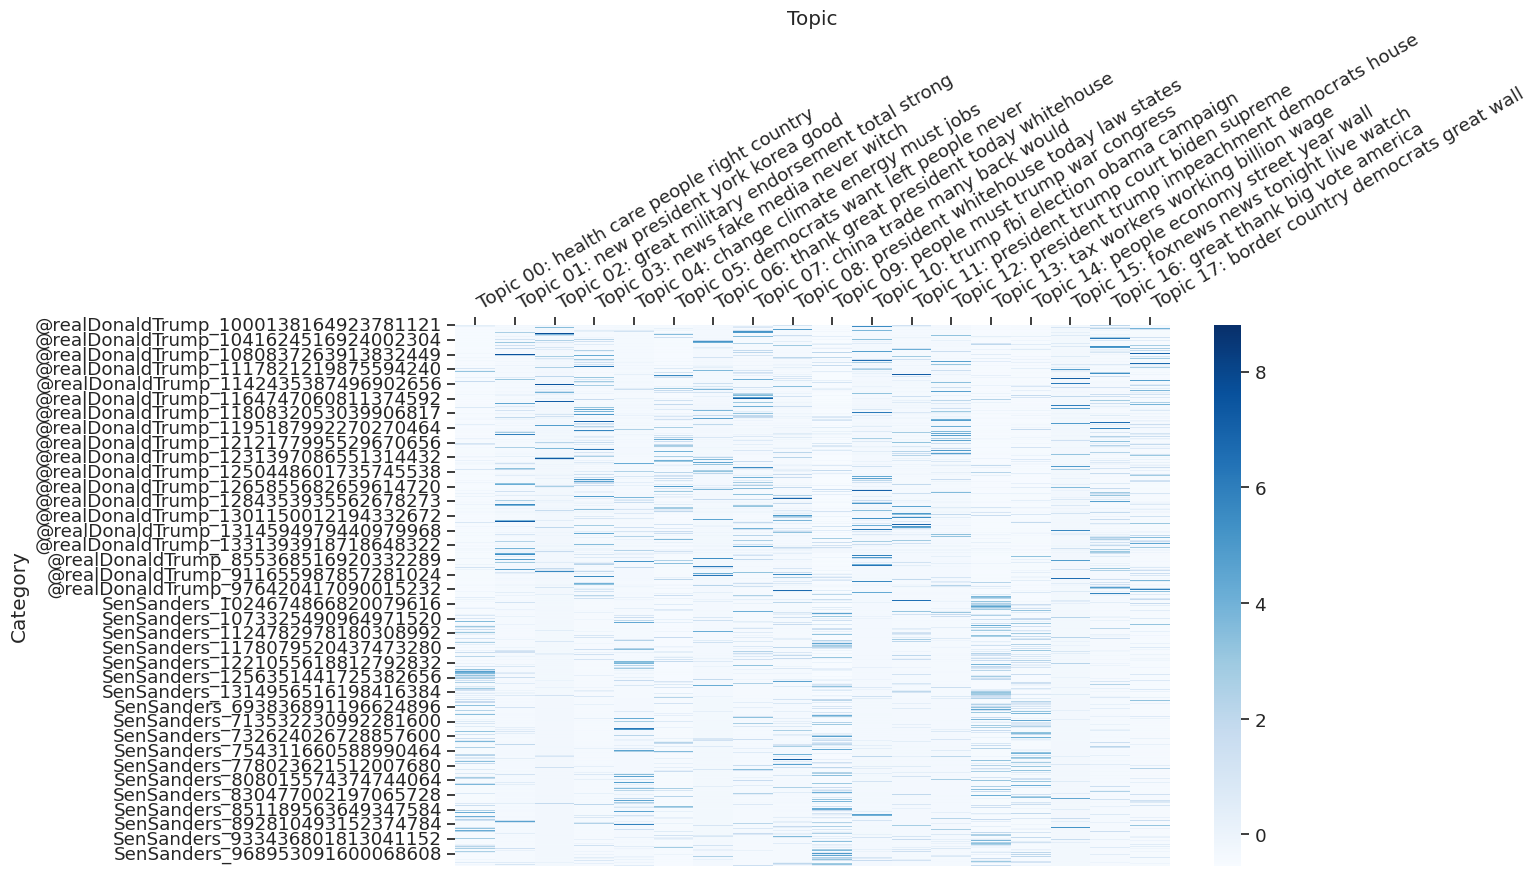

In [109]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(15,9))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

Summary Statistics for Category-Topic Pairs:
Topic  Topic 00: health care people right country  \
count                                30341.000000   
mean                                     0.057869   
std                                      0.132963   
min                                      0.002680   
25%                                      0.004877   
50%                                      0.008263   
75%                                      0.027048   
max                                      0.928655   

Topic  Topic 01: new president york korea good  \
count                             30341.000000   
mean                                  0.048208   
std                                   0.105184   
min                                   0.002591   
25%                                   0.004939   
50%                                   0.007988   
75%                                   0.026147   
max                                   0.889996   

Topic  Topic 02: great mil

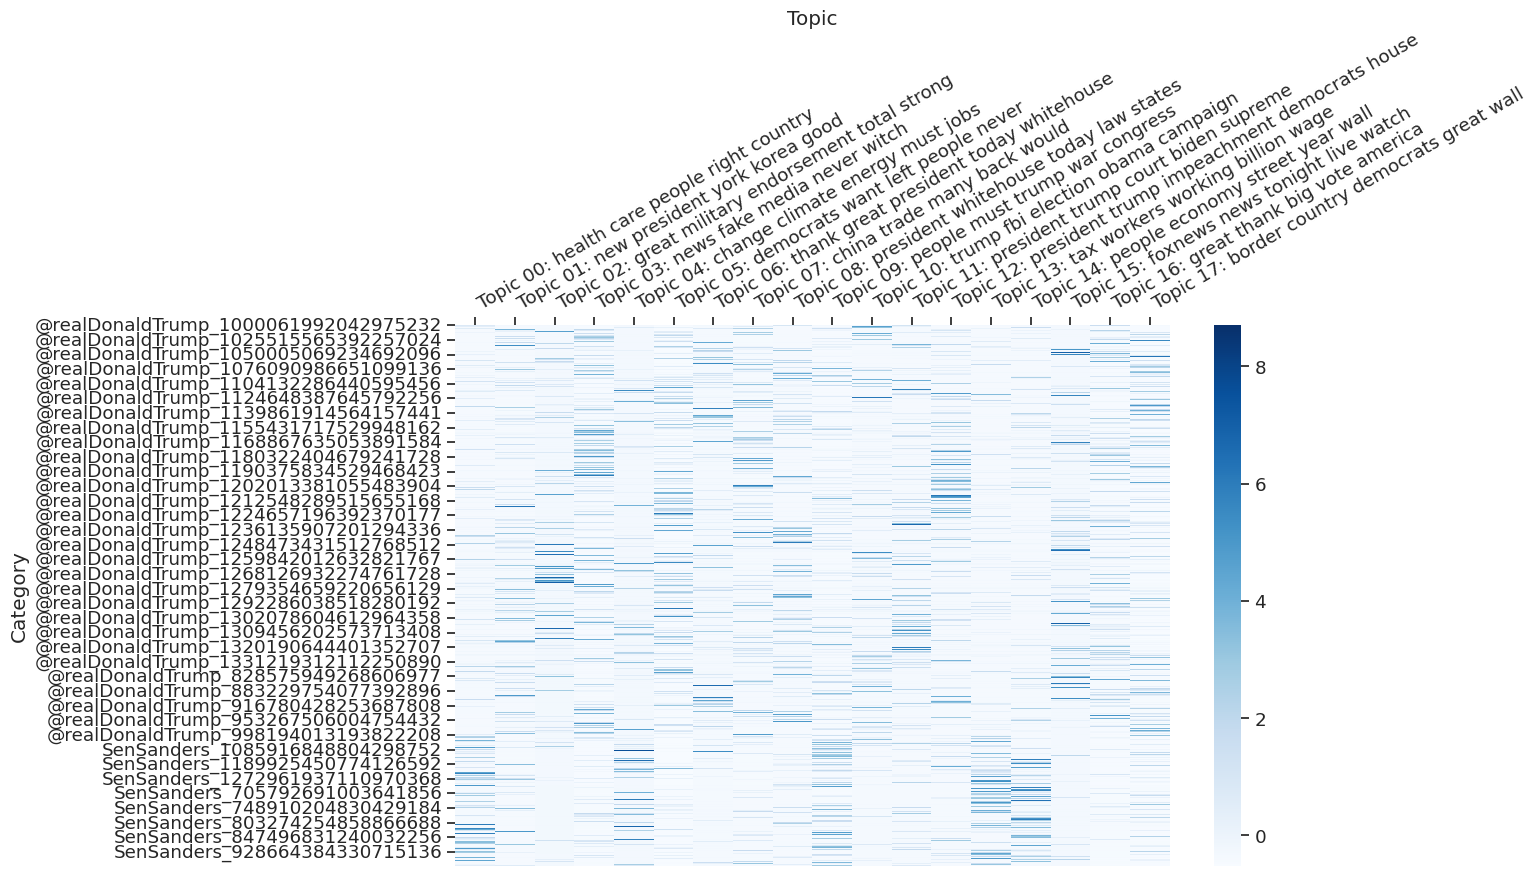

In [113]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

import pandas as pd

def plot_categories_by_topics_heatmap_extension(labels,
                                                topic_distributions,
                                                topic_keys,
                                                output_path=None,
                                                target_labels=None,
                                                color_map=sns.cm.rocket_r,
                                                dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')

    # Calculate summary statistics (mean, median, etc.) for each category-topic pair
    summary_statistics = df_wide.describe()

    # Show the summary statistics
    print("Summary Statistics for Category-Topic Pairs:")
    print(summary_statistics)

    # Normalize the columns
    df_norm_col = (df_wide - df_wide.mean()) / df_wide.std()

    # Show the final plot
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

# Example:
plot_categories_by_topics_heatmap_extension(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=titles,
                                  color_map = 'Blues',
                                  dim=(15,9))